In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [322]:
df = pd.read_csv('https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv')

In [323]:
#pd.options.display.width = 0
pd.set_option('display.max_columns', 30)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [324]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,196,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
41187,25,student,single,high.school,no,no,no,telephone,may,fri,112,4,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [326]:
df.job.unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

In [327]:
df[df.job == 'unknown'].job.count()

330

In [328]:
# job 330, marital 80

In [329]:
df.default.unique()

array(['unknown', 'no', 'yes'], dtype=object)

In [330]:
df[df.loan == 'unknown'][df.education == 'unknown'].count()

/Users/peterniksa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


age               40
job               40
marital           40
education         40
default           40
housing           40
loan              40
contact           40
month             40
day_of_week       40
duration          40
campaign          40
pdays             40
previous          40
poutcome          40
emp_var_rate      40
cons_price_idx    40
cons_conf_idx     40
euribor3m         40
nr_employed       40
y                 40
dtype: int64

In [331]:
df[df == 'unknown'].count()

/Users/peterniksa/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp_var_rate         0
cons_price_idx       0
cons_conf_idx        0
euribor3m            0
nr_employed          0
y                    0
dtype: int64

Input variables1. age (numeric)
2. job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
3. marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
4. education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
5. default: has credit in default? (categorical: “no”, “yes”, “unknown”)
6. housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
7. loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
8. contact: contact communication type (categorical: “cellular”, “telephone”)
9. month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
10. day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=‘no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
16. emp.var.rate: employment variation rate — (numeric)
17. cons.price.idx: consumer price index — (numeric)
18. cons.conf.idx: consumer confidence index — (numeric)
19. euribor3m: euribor 3 month rate — (numeric)
20. nr.employed: number of employees — (numeric)Predict variable (desired target)
y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)

In [332]:
idxdroplist_job = df[df.job == 'unknown'].index
idxdroplist_marital = df[df.marital == 'unknown'].index
idxdroplist_education = df[df.education == 'unknown'].index
idxdroplist_default = df[df.default == 'unknown'].index
idxdroplist_housing = df[df.housing == 'unknown'].index
idxdroplist_loan = df[df.loan == 'unknown'].index
idxdroplist_several = df[(df.job == 'unknown') | (df.marital == 'unknown') | (df.education == 'unknown') | 
                         (df.housing == 'unknown') | (df.loan == 'unknown')].index

In [333]:
idxdroplist_several

Int64Index([    1,    21,    26,    69,    70,    90,   101,   102,   148,
              157,
            ...
            41004, 41005, 41029, 41051, 41102, 41122, 41132, 41158, 41165,
            41166],
           dtype='int64', length=2943)

In [334]:
df2 = df.drop(idxdroplist_several, axis = 0)

In [335]:
pdaynew = list()
for x in df2.pdays.values:
    if x == 999:
        pdaynew.append(1)
    else:
        pdaynew.append(0)
df2.pdays = pdaynew

In [336]:
df2[df2.pdays == 0]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,174,1,0,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
27,37,admin.,married,high.school,no,yes,no,cellular,apr,thu,226,1,0,1,success,-1.8,93.075,-47.1,1.365,5099.1,0
71,50,management,married,university.degree,no,no,no,cellular,aug,tue,89,3,0,1,success,-2.9,92.201,-31.4,0.883,5076.2,0
96,38,admin.,single,high.school,no,yes,no,cellular,apr,thu,882,1,0,1,success,-1.8,93.749,-34.6,0.659,5008.7,1
113,34,admin.,divorced,high.school,no,no,no,cellular,nov,tue,492,2,0,3,success,-3.4,92.649,-30.1,0.716,5017.5,0
115,47,management,married,university.degree,no,yes,no,telephone,may,wed,267,2,0,3,success,-1.8,93.876,-40.0,0.682,5008.7,0
180,50,self-employed,married,basic.9y,no,yes,yes,cellular,may,mon,673,6,0,1,success,-1.8,92.893,-46.2,1.354,5099.1,1
203,43,unemployed,married,high.school,no,no,no,cellular,aug,thu,319,4,0,2,success,-2.9,92.201,-31.4,0.873,5076.2,0


In [337]:
df2[df2.default == 'unknown'].count()

age               7757
job               7757
marital           7757
education         7757
default           7757
housing           7757
loan              7757
contact           7757
month             7757
day_of_week       7757
duration          7757
campaign          7757
pdays             7757
previous          7757
poutcome          7757
emp_var_rate      7757
cons_price_idx    7757
cons_conf_idx     7757
euribor3m         7757
nr_employed       7757
y                 7757
dtype: int64

In [338]:
#eddum = pd.get_dummies(df2.education,drop_first=True)
#df3 = pd.concat([df2, eddum],axis = 0, join = 'outer')
df3 = pd.concat([df2.drop('poutcome', axis=1),pd.get_dummies(df2.poutcome, drop_first = True)], axis = 1)
#df3 = pd.concat([df3.drop('previous', axis=1),pd.get_dummies(df3.previous, drop_first = True)], axis = 1)
#df3
#df3.isna().sum()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,nonexistent,success
age,1.000000,0.002405,0.005519,-0.038409,0.028479,-0.003563,-0.001236,0.127644,0.007695,-0.021054,0.030130,-0.020235,0.038376
duration,0.002405,1.000000,-0.071110,-0.044328,0.016304,-0.025003,0.007530,-0.008656,-0.029029,-0.040722,0.405832,-0.008353,0.042707
campaign,0.005519,-0.071110,1.000000,0.051525,-0.078478,0.150752,0.128665,-0.010713,0.134783,0.143150,-0.065117,0.086642,-0.049517
pdays,-0.038409,-0.044328,0.051525,1.000000,-0.581242,0.268651,0.080663,-0.090503,0.291975,0.366858,-0.319330,0.486299,-0.952329
previous,0.028479,0.016304,-0.078478,-0.581242,1.000000,-0.419647,-0.208783,-0.056856,-0.450672,-0.494617,0.221159,-0.881791,0.519900
emp_var_rate,-0.003563,-0.025003,0.150752,0.268651,-0.419647,1.000000,0.775418,0.211865,0.972422,0.907920,-0.292265,0.468599,-0.254890
cons_price_idx,-0.001236,0.007530,0.128665,0.080663,-0.208783,0.775418,1.000000,0.070521,0.689600,0.524272,-0.133084,0.306197,-0.078278
cons_conf_idx,0.127644,-0.008656,-0.010713,-0.090503,-0.056856,0.211865,0.070521,1.000000,0.292641,0.115583,0.051424,0.106203,0.084286
euribor3m,0.007695,-0.029029,0.134783,0.291975,-0.450672,0.972422,0.689600,0.292641,1.000000,0.945336,-0.300580,0.482474,-0.276898
nr_employed,-0.021054,-0.040722,0.143150,0.366858,-0.494617,0.907920,0.524272,0.115583,0.945336,1.000000,-0.347830,0.485199,-0.346459


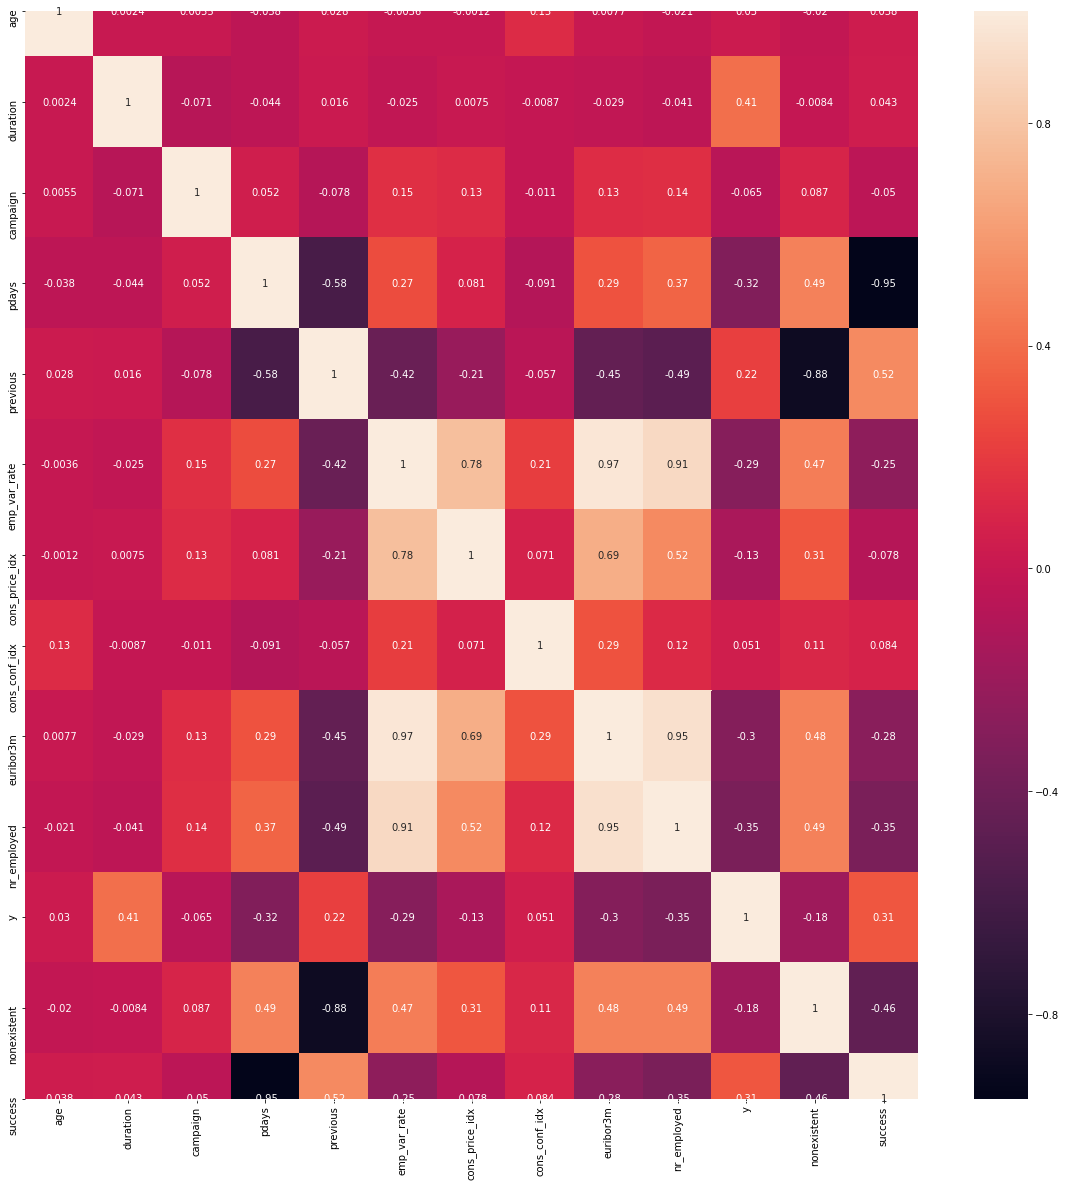

In [339]:
corr = df3.corr()
plt.figure(figsize = (20,20))
sb.heatmap(corr,annot = True)
corr

y correlates with duration, nr_employed, pdays, euribor3m

In [340]:
df[df.education == 'illiterate'].count()

age               18
job               18
marital           18
education         18
default           18
housing           18
loan              18
contact           18
month             18
day_of_week       18
duration          18
campaign          18
pdays             18
previous          18
poutcome          18
emp_var_rate      18
cons_price_idx    18
cons_conf_idx     18
euribor3m         18
nr_employed       18
y                 18
dtype: int64

In [371]:
x = df[['nr_employed', 'pdays', 'previous']].values
y = df.y.values
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
logres = LogisticRegression()
logres.fit(X_train,y_train)
y_pred = logres.predict(X_test)
THRESHOLD = 0.1

/Users/peterniksa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [372]:

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[8949,  162],
       [ 913,  273]])

In [373]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9111
           1       0.63      0.23      0.34      1186

    accuracy                           0.90     10297
   macro avg       0.77      0.61      0.64     10297
weighted avg       0.88      0.90      0.87     10297



In [367]:
df3.previous.unique()

array([0, 2, 1, 3, 5, 4, 7, 6])